In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
city_data = pd.read_csv('/content/content/MyDrive/Capstone_Project/Datasets/archive/city_day.csv', encoding='latin-1')

In [ ]:
city_data.head()

,City,Date,PM2.5,PM10,NO,N2O,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/15,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/15,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/15,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/15,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/15,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_data.tail()

,City,Date,PM2.5,PM10,NO,N2O,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/06/20,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/20,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/20,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/20,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01/07/20,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   N2O         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#converting column Date into Date format
city_data['Date']=pd.to_datetime(city_data['Date'])

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   N2O         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
df1 = city_data.drop(['PM2.5','PM10','NOx','NH3','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket'],axis=1)

In [ ]:
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['N2O']=df1['N2O'].fillna((df1['N2O'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))

In [ ]:
# Printing the number of N/A values in each columns of station_hour dataset
print(df1.isna().sum())

City    0
Date    0
NO      0
N2O     0
CO      0
dtype: int64


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    29531 non-null  object        
 1   Date    29531 non-null  datetime64[ns]
 2   NO      29531 non-null  float64       
 3   N2O     29531 non-null  float64       
 4   CO      29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
city_all = df1.pivot_table(values='N2O', index=['Date'], columns='City')
city_all=city_all.add_suffix('_N2O')
city=city_all.resample(rule='MS').mean()
city.head()

City,Ahmedabad_N2O,Aizawl_N2O,Amaravati_N2O,Amritsar_N2O,Bengaluru_N2O,Bhopal_N2O,Brajrajnagar_N2O,Chandigarh_N2O,Chennai_N2O,Coimbatore_N2O,...,Jorapokhar_N2O,Kochi_N2O,Kolkata_N2O,Lucknow_N2O,Mumbai_N2O,Patna_N2O,Shillong_N2O,Talcher_N2O,Thiruvananthapuram_N2O,Visakhapatnam_N2O
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,23.601935,NaN,NaN,NaN,15.585806,NaN,NaN,NaN,25.773871,NaN,...,NaN,NaN,NaN,16.052903,21.69,21.400000,NaN,NaN,NaN,NaN
2015-02-01,27.920000,NaN,NaN,NaN,21.107857,NaN,NaN,NaN,15.208929,NaN,...,NaN,NaN,NaN,21.309286,21.69,20.294286,NaN,NaN,NaN,NaN
2015-03-01,26.264839,NaN,NaN,NaN,20.958387,NaN,NaN,NaN,32.312903,NaN,...,NaN,NaN,NaN,22.815484,21.69,21.864286,NaN,NaN,NaN,NaN
2015-04-01,20.661000,NaN,NaN,NaN,12.249667,NaN,NaN,NaN,27.268667,NaN,...,NaN,NaN,NaN,20.408667,21.69,19.391429,NaN,NaN,NaN,NaN
2015-05-01,19.456774,NaN,NaN,NaN,21.188387,NaN,NaN,NaN,20.155161,NaN,...,NaN,NaN,NaN,14.196774,21.69,20.084286,NaN,NaN,NaN,NaN


In [ ]:
#form a new column containing India's N2O for every month by taking the average of all cities for that month
city['India_N2O']=city.mean(axis=1)
city.head()

City,Ahmedabad_N2O,Aizawl_N2O,Amaravati_N2O,Amritsar_N2O,Bengaluru_N2O,Bhopal_N2O,Brajrajnagar_N2O,Chandigarh_N2O,Chennai_N2O,Coimbatore_N2O,...,Kochi_N2O,Kolkata_N2O,Lucknow_N2O,Mumbai_N2O,Patna_N2O,Shillong_N2O,Talcher_N2O,Thiruvananthapuram_N2O,Visakhapatnam_N2O,India_N2O
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,23.601935,NaN,NaN,NaN,15.585806,NaN,NaN,NaN,25.773871,NaN,...,NaN,NaN,16.052903,21.69,21.400000,NaN,NaN,NaN,NaN,21.154753
2015-02-01,27.920000,NaN,NaN,NaN,21.107857,NaN,NaN,NaN,15.208929,NaN,...,NaN,NaN,21.309286,21.69,20.294286,NaN,NaN,NaN,NaN,22.366104
2015-03-01,26.264839,NaN,NaN,NaN,20.958387,NaN,NaN,NaN,32.312903,NaN,...,NaN,NaN,22.815484,21.69,21.864286,NaN,NaN,NaN,NaN,23.774335
2015-04-01,20.661000,NaN,NaN,NaN,12.249667,NaN,NaN,NaN,27.268667,NaN,...,NaN,NaN,20.408667,21.69,19.391429,NaN,NaN,NaN,NaN,22.588492
2015-05-01,19.456774,NaN,NaN,NaN,21.188387,NaN,NaN,NaN,20.155161,NaN,...,NaN,NaN,14.196774,21.69,20.084286,NaN,NaN,NaN,NaN,22.729078


In [ ]:
#installing pmdarima
!pip install pmdarima;
from pmdarima import auto_arima;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00


In [ ]:
auto_arima(y=city['India_N2O'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -176.578
Date:                Tue, 22 Aug 2023   AIC                            361.157
Time:                        15:50:02   BIC                            370.263
Sample:                    01-01-2015   HQIC                           364.782
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8671      1.982      2.456      0.014       0.983       8.751
ar.L1          1.0673      0.127      8.380      0.000       0.818       1.317
ar.L2         -0.2530      0.124     -2.039      0.041      -0.496      -0.010
sigma2         7.7468      1.131      6.849      0.000       5.530       9.964
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.60
Prob(Q):                              0.90   Prob(JB):                         0.01
Heteroskedasticity (H):               1.12   Skew:                             0.64
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#dividing into train and test:
train_data=city['India_N2O'][:'2018-12']
test_data=city['India_N2O'][:'2019-12']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_N2O   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -114.897
Date:                              Tue, 22 Aug 2023   AIC                            239.793
Time:                                      15:50:05   BIC                            249.044
Sample:                                  01-01-2015   HQIC                           243.275
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0931      0.165      0.564      0.573      -0.230       0.417
ma.L2          0.0076      0.170      0.045      0.964      -0.326       0.342
ar.S.L12       0.9989      1.151      0.868      0.385      -1.257       3.254
ma.S.L12      -0.9780     11.574     -0.084      0.933     -23.664      21.708
sigma2         6.7527     70.208      0.096      0.923    -130.852     144.357
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.49
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               2.47   Skew:                             0.72
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

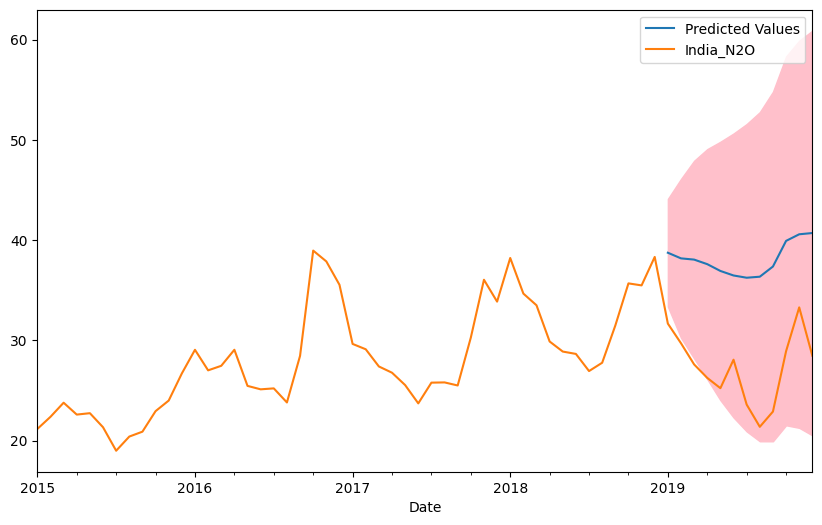

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

#predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=12, dynamic=True)

#find the confidence intervals
confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_N2O']
upper_limits = confidence_intervals.loc[:,'upper India_N2O']

#plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

In [ ]:
from sklearn.metrics import mean_squared_error

test= city['India_N2O']['2019-01':'2019-12']
RMSE=np.sqrt(mean_squared_error(forecasts.predicted_mean,test))
print('RMSE = ',RMSE)

y_true=test
y_pred= forecasts.predicted_mean
mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

RMSE =  11.124115323315786
MAPE =  41.51520022779876


<Axes: xlabel='Date'>

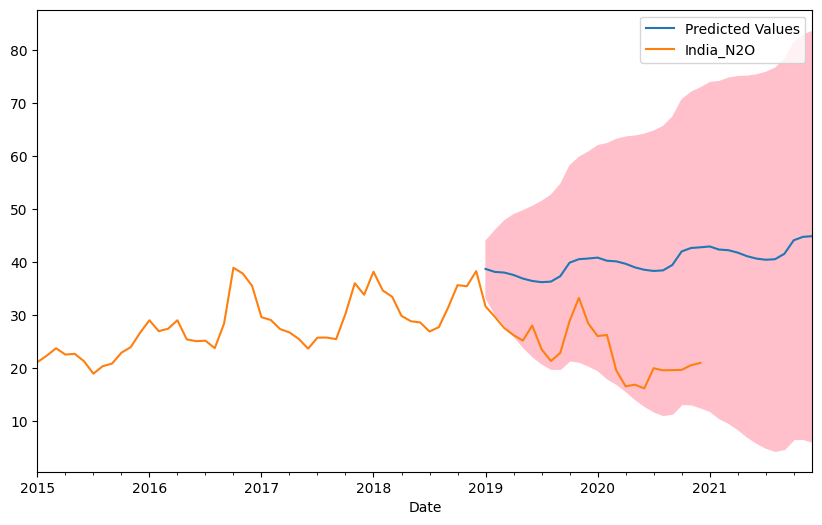

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=36, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_N2O']
upper_limits = confidence_intervals.loc[:,'upper India_N2O']

#plot the forecasted data
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#Plot India's AQI Data
city['India_N2O'].plot(legend=True, ax=ax)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the Adaptive KNN model
def adaptive_knn(train_data, test_data, k_value):
    predictions = []

    knn = KNeighborsRegressor(n_neighbors=k_value, weights='distance')

    for i in range(len(test_data)):
        train_index = train_data.index[-k_value:].to_julian_date().values.reshape(-1, 1)
        train_values = train_data[-k_value:]

        knn.fit(train_index, train_values)

        test_index = test_data.index[i].to_julian_date().reshape(-1, 1)
        prediction = knn.predict(test_index)
        predictions.append(prediction[0])

    return predictions

# Use a single k_value for Adaptive KNN
k_value = 5

# Get the predictions for Adaptive KNN
adaptive_knn_predictions = adaptive_knn(train_data, test_data, k_value)


In [ ]:
import xgboost as xgb

# Define the XGBoost model
def xgboost_model(train_data, test_data):
    xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate = 0.1)
    xgb_reg.fit(train_data.index.to_julian_date().values.reshape(-1, 1), train_data)
    predictions = xgb_reg.predict(test_data.index.to_julian_date().values.reshape(-1, 1))
    return predictions

# Get the predictions for XGBoost
xgboost_predictions = xgboost_model(train_data, test_data)

In [ ]:
# Generate SARIMA forecasts for the same number of steps as the test data length
forecasts = results.get_forecast(steps=len(test_data), dynamic=True)

# Calculate RMSE and MAPE for all models
from sklearn.metrics import mean_squared_error

# SARIMA Model RMSE and MAPE
sarima_rmse = np.sqrt(mean_squared_error(forecasts.predicted_mean, test_data))
sarima_mape = np.mean(np.abs((test_data - forecasts.predicted_mean) / test_data)) * 100

# Adaptive KNN RMSE and MAPE
adaptive_knn_rmse = np.sqrt(mean_squared_error(adaptive_knn_predictions, test_data))
adaptive_knn_mape = np.mean(np.abs((test_data - adaptive_knn_predictions) / test_data)) * 100

# XGBoost RMSE and MAPE
xgboost_rmse = np.sqrt(mean_squared_error(xgboost_predictions, test_data))
xgboost_mape = np.mean(np.abs((test_data - xgboost_predictions) / test_data)) * 100

# Print the results
print("SARIMA Model - RMSE: {:.2f}, MAPE: {:.2f}%".format(sarima_rmse, sarima_mape))
print("Adaptive KNN Model - RMSE: {:.2f}, MAPE: {:.2f}%".format(adaptive_knn_rmse, adaptive_knn_mape))
print("XGBoost Model - RMSE: {:.2f}, MAPE: {:.2f}%".format(xgboost_rmse, xgboost_mape))

SARIMA Model - RMSE: 14.89, MAPE: 41.52%
Adaptive KNN Model - RMSE: 7.51, MAPE: 25.96%
XGBoost Model - RMSE: 5.08, MAPE: 8.76%


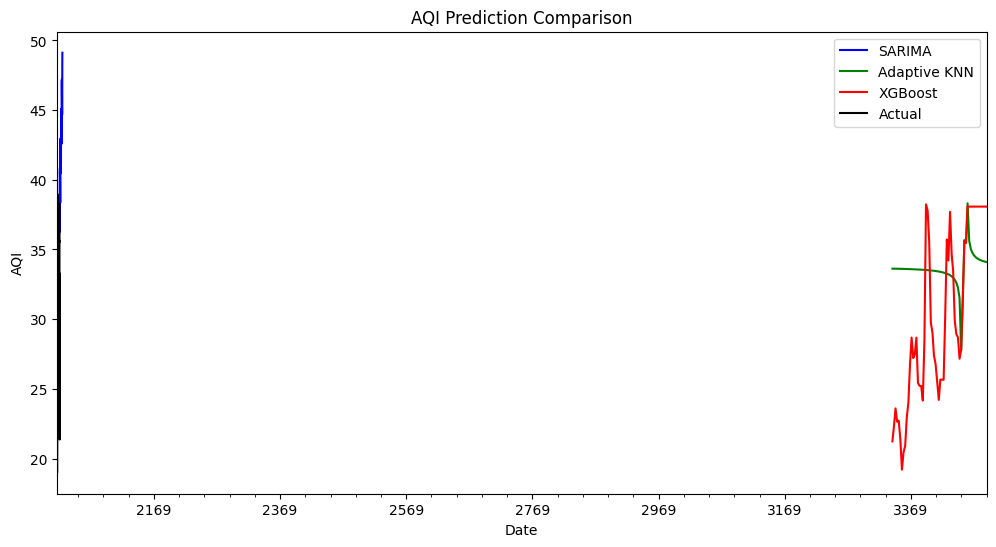

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot SARIMA predictions
forecasts.predicted_mean.plot(ax=ax, label='SARIMA', color='blue')

# Plot Adaptive KNN predictions
ax.plot(test_data.index, adaptive_knn_predictions, label='Adaptive KNN', color='green')

# Plot XGBoost predictions
ax.plot(test_data.index, xgboost_predictions, label='XGBoost', color='red')

# Plot actual NO data
test_data.plot(ax=ax, label='Actual', color='black')

plt.legend()
plt.xlabel('Date')
plt.ylabel('')
plt.title('AQI Prediction Comparison')
plt.show()

In [ ]:
from google.colab import files
import pickle

# Save the DataFrame as a pickle file
with open('city.pickle', 'wb') as f:
    pickle.dump(city['India_N2O'], f)

files.download('city.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>